In [209]:
from scipy import stats
from scipy.stats import t, sem
from random import shuffle
from statistics import mean
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import pandas as pd
import numpy as np
import warnings
import math

In [210]:
n=0

file0=open('Alfonso.txt','r')
for linea in file0.readlines():
    n+=1
file0.close()

A= []

file01=open('Alfonso.txt','r')

for i in range(n):
    infile01=list(file01.readline())
    A.append(infile01[:1][0])
file01.close()


auxtable= []

file02 = open('Alfonso1.txt','r')
for i in range(n):
    infile02=(list(map(float,(file02.readline().split()))))
    auxtable.append(infile02[:1][0])
file02.close()

Atable = [] # lista de tiempos de llegada del primer trabajador
Atable1 = []
Stable = [] # lista de tiempos de servicio del primer trabajador
Dtable = [] # lista de tiempos de demora del primer trabajador

c = - 1.13

for i in range(len(A)):
    c += auxtable[i]
    if(A[i] == 'P' or A[i] == 'L'):
        Atable.append(c)
        Stable.append(auxtable[i])

Ctable = [0.0 for i in range(len(Atable))]

for i in range(len(Atable)):

    if (Atable[i] < Ctable[i-1]):
        Dtable.append(Ctable[i-1]-Atable[i])
    else:
        Dtable.append(0.0)
        
    Ctable[i]= Atable[i]+Stable[i]+Dtable[i]


for i in range(len(Atable)):
    if(i == 0):
        Atable1.append(Atable[i])
    else:
        Atable1.append(Atable[i] - Atable[i-1])



In [219]:
d = {'T. Llegada A.':Atable,'T. Llegada I.':Atable1,'T. Servicio':Stable}   #creo un dicionario y lo convierto en data frame 
Alf_df = pd.DataFrame(d)

#Ap25 = Alf_df['T. Llegada I.'].quantile(0.25)
#Ap75 = Alf_df['T. Llegada I.'].quantile(0.75)
Sp25 = Alf_df['T. Servicio'].quantile(0.25)
Sp75 = Alf_df['T. Servicio'].quantile(0.75)
Alf_final = Alf_df[(Alf_df['T. Servicio'] >= Sp25) & (Alf_df['T. Servicio'] <= Sp75) ]


Atable = list(Alf_final['T. Llegada A.'])
Atable1 = list(Alf_final['T. Llegada I.'])
Stable = list(Alf_final['T. Servicio'])

Alf_final.head()



,T. Llegada A.,T. Llegada I.,T. Servicio
0,0.00,0.00,1.13
5,38.75,3.93,0.98
7,46.02,1.09,1.09
10,220.57,52.40,0.57
12,229.01,1.72,1.07


********Autocorrelación de tiempos de llegada*****************************************


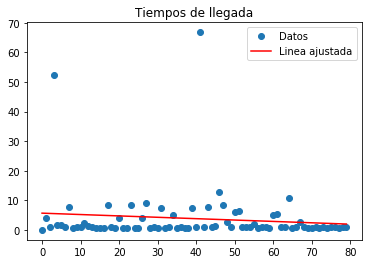

P-Valor de tiempos de llegada: 0.3147188145079211
Se cumple la hipótesis alternativa 
 

CONJUNTO DE PUNTOS

[ 1.00000000e+00 -6.52977601e-02  5.70774522e-02 -6.34168212e-02
  2.53884579e-02  4.64922822e-02  3.73827104e-03 -3.30804043e-03
 -4.41032145e-02 -1.95262475e-02  5.18790795e-02 -7.51182102e-02
 -5.59694976e-02 -6.31622136e-02  8.36548712e-02 -4.44207392e-02
 -4.49550314e-02 -3.83441067e-02  4.28774842e-03 -2.36341474e-02
  4.67308194e-02 -3.43442923e-02 -7.15975202e-02  4.81441663e-02
  6.93428004e-02 -7.30182211e-02 -5.11413888e-02 -7.42869571e-02
 -2.82520971e-02 -6.86806674e-02 -4.40940760e-02 -5.22189698e-02
 -7.32422387e-02 -5.96973882e-02  3.63313326e-04 -6.88860276e-02
 -1.68607435e-02 -4.72907492e-02  4.16284736e-01 -3.55705103e-02
  4.27359331e-02]


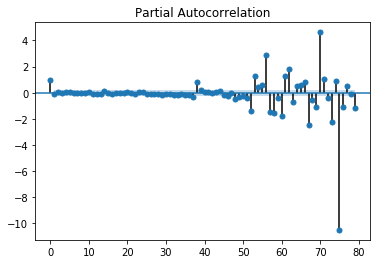


 

********Autocorrelación de tiempos de servicio*****************************************


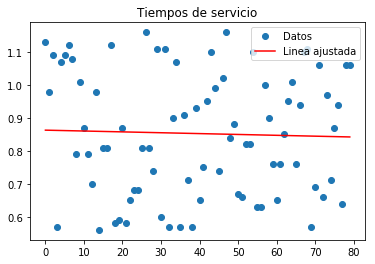

P-Valor de tiempos de servicio: 0.7753100477116199
Se cumple la hipótesis alternativa 
 

CONJUNTO DE PUNTOS

[ 1.         -0.05278476  0.01384466  0.11652178 -0.00573507  0.19735997
 -0.16554347 -0.05682373 -0.02368202 -0.07673816  0.06777599  0.03244066
 -0.16667873 -0.0021009  -0.03092322 -0.07219262  0.02010891 -0.04460732
  0.01533723 -0.03394679  0.06217209  0.08783289 -0.06962134 -0.12712803
  0.04616094 -0.02500498 -0.07815157  0.02938316 -0.11349821  0.03211953
 -0.08102815 -0.06747974  0.07758621 -0.09165476  0.03952582 -0.04135534
 -0.05917791  0.25933305 -0.0293402   0.02031923  0.00797843]


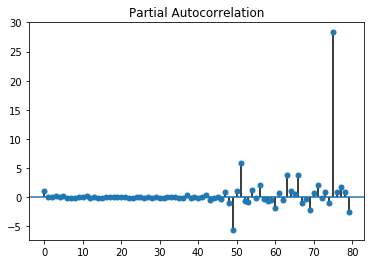

In [220]:
# se grafican los datos y la linea ajustada
x1 = np.array([i for i in range(len(Atable1))])
pendiente1, intercepto1, r_valor1, p_valor1, std_error1 = stats.linregress(x1, Atable1)

print("********Autocorrelación de tiempos de llegada*****************************************")
plt.plot(x1, Atable1, 'o', label='Datos')
plt.plot(x1, intercepto1 + pendiente1*x1, 'r', label='Linea ajustada')
plt.title("Tiempos de llegada")
plt.legend()
plt.show()



print("P-Valor de tiempos de llegada:",p_valor1)
# se determina la autocorrelacion
if(p_valor1>0.05):
    print("Se cumple la hipótesis alternativa \n \n")
    r1 = (np.correlate(x1-x1.mean(),x1-x1.mean(), mode='full'))/(x1.var()*len(x1))
    autocorr1= r1[r1.size//2:]
    # print("Autocorrelación:",autocorr1, "\n \n")
    print ("CONJUNTO DE PUNTOS\n")
    print (sm.graphics.tsa.acf(Atable1))
    sm.graphics.tsa.plot_pacf(Atable1, lags = len(Atable1), alpha = 0.05)
    plt.show()   
    print("\n \n")

else:
    print("Hipótesis nula, P-Valor es menor que 0.05 \n \n")




# se grafican los datos y la linea ajustada
x2 = np.array([i for i in range(len(Stable))])
pendiente2, intercepto2, r_valor2, p_valor2, std_error2 = stats.linregress(x2, Stable)

print("********Autocorrelación de tiempos de servicio*****************************************")
plt.plot(x2, Stable, 'o', label='Datos')
plt.plot(x2, intercepto2 + pendiente2*x2, 'r', label='Linea ajustada')
plt.title("Tiempos de servicio")
plt.legend()
plt.show()


print("P-Valor de tiempos de servicio:",p_valor2)
# se determina la autocorrelacion
if(p_valor2>0.05):
    print("Se cumple la hipótesis alternativa \n \n")
    r2 = (np.correlate(x2-x2.mean(),x2-x2.mean(), mode='full'))/(x2.var()*len(x2))
    autocorr2= r2[r2.size//2:]
   # print("Autocorrelación:",autocorr2, "\n \n")
    print ("CONJUNTO DE PUNTOS\n")
    print (sm.graphics.tsa.acf(Stable))
    sm.graphics.tsa.plot_pacf(Stable, lags = len(Stable), alpha = 0.05)
    plt.show()
    
    print("\n \n")

else:
    print("Hipótesis nula, P-Valor es menor que 0.05 \n \n")




In [221]:
distribuciones = [
        "exponnorm",
        "norm",            #Normal (Gaussian)
        "alpha",           #Alpha
        "anglit",          #Anglit
        "beta",            #Beta
        "betaprime",       #Beta Prime
        "bradford",        #Bradford
        "burr",            #Burr
        "cauchy",          #Cauchy
        "chi2",            #Chi-squared
        "cosine",          #Cosine
        "dgamma",          #Double Gamma
        "dweibull",        #Double Weibull
        "expon",           #Exponential
        "exponweib",       #Exponentiated Weibull
        "gamma",
        "kstwobign",       #Kolmogorov-Smirnov two-sided test for Large N
        "lognorm"
    ] 

In [222]:
arrivesDistributionResults = []
for distName in distribuciones:
    dist = getattr(stats, distName)
    fittedData = dist.fit(Atable1)
    D, p = stats.kstest(Atable1, distName, args=fittedData);
    arrivesDistributionResults.append((distName,p,fittedData))
auxP = 0
arrivesAuxDist = ""
print("P Values for each distribution and fit parameter: \n")
for distribution in arrivesDistributionResults:
    print("{}: {}".format(distribution[0], distribution[1]))
    if(auxP<distribution[1]):
        arrivesAuxDist = distribution[0]
        auxP = distribution[1]
        arrivesAuxParams = distribution[2]
print("\nThe correct distribution for the dataset is {0} as it has the highest p value ({1}).".format(arrivesAuxDist,auxP))

P Values for each distribution and fit parameter: 

exponnorm: 5.498362782826102e-15
norm: 2.251660864586586e-09
alpha: 0.0009256312404258745
anglit: 1.0468333941331696e-13
beta: 1.344583520933772e-07
betaprime: 0.00013770752792572756
bradford: 3.101644514330979e-20
burr: 0.00023002462963669552
cauchy: 0.00037239678726459254
chi2: 6.304987155119684e-10
cosine: 3.523211831400559e-11
dgamma: 1.3761079860644183e-06
dweibull: 1.6606143371325196e-07
expon: 7.72561317818538e-12
exponweib: 5.7811136747133236e-06
gamma: 3.950955904436648e-70
kstwobign: 5.343012685627349e-11
lognorm: 2.462650241013421e-05

The correct distribution for the dataset is alpha as it has the highest p value (0.0009256312404258745).


In [223]:
servicesDistributionResults = []
for distName in distribuciones:
    dist = getattr(stats, distName)
    fittedData = dist.fit(Stable)
    D, p = stats.kstest(Stable, distName, args=fittedData);
    servicesDistributionResults.append((distName,p,fittedData))
auxP = 0
servicesAuxDist = ""
print("P Values for each distribution:\n")
for distribution in servicesDistributionResults:
    print("{}: {}".format(distribution[0], distribution[1]))
    if(auxP<distribution[1]):
        servicesAuxDist = distribution[0]
        auxP = distribution[1]
        servicesAuxParams = distribution[2]
print("\nThe correct distribution for the dataset is {0} as it has the highest p value ({1}).".format(servicesAuxDist,auxP))

P Values for each distribution:

exponnorm: 0.31556181273192374
norm: 0.3156083266497306
alpha: 0.3494573931566084
anglit: 0.20797137711474017
beta: 0.9880552549465232
betaprime: 0.3364032703172345
bradford: 0.2390359814200013
burr: 0.7882510862602227
cauchy: 0.05772611646804018
chi2: 1.230866875882053e-10
cosine: 0.24074913363431066
dgamma: 0.4671742908140806
dweibull: 0.5155988713791548
expon: 0.02645322324169188
exponweib: 0.05321934939891213
gamma: 0.31706301278316396
kstwobign: 0.28813418005233804
lognorm: 0.32828928154249903

The correct distribution for the dataset is beta as it has the highest p value (0.9880552549465232).


# 

In [224]:
arrivalsDist = getattr(stats, arrivesAuxDist)
servicesDist = getattr(stats, servicesAuxDist)

In [225]:

j = []
def charge():
 
    x=0.0
    a=[]
    while x<=205:
        service= servicesDist.rvs(servicesAuxParams[0], servicesAuxParams[1])
        a.append([float(x),float(service)])
        x+=arrivalsDist.rvs(arrivesAuxParams[0], arrivesAuxParams[1])	
    return a

In [226]:
def replica():
    data=charge()
    i=0
    c=0.0
    l=len(data)
    j.append(l)
    while (i<l):
        a=data[i][0]
        if(a<c):
            data[i].append(c-a)
        else:data[i].append(0.0)
        c=data[i][0]+data[i][1]+data[i][2]
        i+=1
    sp=0.0
    dp=0.0
    wp=0.0
    for a,s,d in data:
        sp+=s
        dp+=d
        wp+=s+d
    #job-average statistic
    sp/=l				#Average service time
    spi=1/sp			#service rate
    rp=data[-1][0]/l	#Average interarrival time
    rpi=1/rp			#arival rate
    dp/=l				#average delay
    wp/=l				#average wait time
    #time-average statistic
    tn=(l/c)*wp			#node
    tq=(l/c)*dp			#queue
    ts=(l/c)*sp			#service
    
    return [sp,spi,rp,rpi,dp,wp,tn,tq,ts]

def confidence(array):
    n = len(array)
    m = mean(array)
    error = sem(array)
    h = error*t.ppf((1+0.95)/2,n-1)
    start = m-h
    end = m+h
    interval = [start,end]

    return interval 

    
if __name__=='__main__':
    p=[]
    n=10
    for i in range(n):
        p.append(replica())
        
    asp=0.0; aspi=0.0; arp=0.0; arpi=0.0; adp=0.0; awp=0.0; atn=0.0 ;atq=0.0; ats=0.0
    
    asp_c = []; aspi_c = []; arp_c = []; arpi_c = []; adp_c = []; awp_c = []; atn_c = []; atq_c =[]; ats_c = []
 
    for sp,spi,rp,rpi,dp,wp,tn,tq,ts in p:
        asp+=sp
        aspi+=spi
        arp+=rp
        arpi+=rpi
        adp+=dp
        awp+=wp
        atn+=tn
        atq+=tq
        ats+=ts
        
        asp_c.append(sp)
        aspi_c.append(spi)
        arp_c.append(rp)
        arpi_c.append(rpi)
        adp_c.append(dp)
        awp_c.append(wp)
        atn_c.append(tn)
        atq_c.append(tq)
        ats_c.append(ts)
        
        
    asp/=n
    aspi/=n
    arp/=n
    arpi/=n
    adp/=n
    awp/=n
    atn/=n
    atq/=n
    ats/=n
    
    
    print("\n\t\t *** NON-CONFIDENCE STATISTICS: *** \n")
    print("\n\t\tJob-Average Statistics: \n")
    print("\tAverage service time:\t\t",asp)
    print("\tService rate:\t\t\t",aspi)
    print("\tAverage interarrival time: \t",arp)
    print("\tArival rate:  \t\t\t",arpi)
    print("\tAverage delay:\t\t\t",adp)
    print("\tAverage wait time:\t\t",awp)
    print("\n\t\tTime-Average Statistics: \n")
    print("\tnode: \t\t",atn)
    print("\tqueue: \t\t",atq)
    print("\tservice: \t",ats)
    
    print("\n\t\t *** 95% CONFIDENCE STATISTICS: *** \n")
    print("\n\t\tJob-Average Statistics: \n")
    print("\tAverage service time:\t\t",confidence(asp_c))
    print("\tService rate:\t\t\t",confidence(aspi_c))
    print("\tAverage interarrival time: \t",confidence(arp_c))
    print("\tArival rate:  \t\t\t",confidence(arpi_c))
    print("\tAverage delay:\t\t\t",confidence(adp_c))
    print("\tAverage wait time:\t\t",confidence(awp_c))
    print("\n\t\tTime-Average Statistics: \n")
    print("\tnode: \t\t",confidence(atn_c))
    print("\tqueue: \t\t",confidence(atq_c))
    print("\tservice: \t",confidence(ats_c), "\n")


		 *** NON-CONFIDENCE STATISTICS: *** 


		Job-Average Statistics: 

	Average service time:		 0.49406678628974393
	Service rate:			 2.0314285697369163
	Average interarrival time: 	 0.9923555708452783
	Arival rate:  			 1.2772862603155501
	Average delay:			 4.318512978201796
	Average wait time:		 4.81257976449154

		Time-Average Statistics: 

	node: 		 6.110343746847234
	queue: 		 5.508135773949559
	service: 	 0.6022079728976766

		 *** 95% CONFIDENCE STATISTICS: *** 


		Job-Average Statistics: 

	Average service time:		 [0.4716752192689293, 0.5164583533105587]
	Service rate:			 [1.9382092598940353, 2.1246478795797974]
	Average interarrival time: 	 [0.4943318009394293, 1.4903793407511274]
	Arival rate:  			 [0.9133011654716132, 1.641271355159487]
	Average delay:			 [3.1211982817797637, 5.515827674623829]
	Average wait time:		 [3.6095794236280865, 6.015580105354993]

		Time-Average Statistics: 

	node: 		 [3.4532645724393265, 8.767422921255143]
	queue: 		 [2.9941699181638963, 8.0221016